Import.

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

pd.set_option("display.max_columns",None)

Load.

In [2]:
df = pd.read_csv(r"..\data\datasets\advertising.csv")
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Split fitur-target.

In [4]:
X = df.drop(columns="Sales")
y = df["Sales"]

Missing values handling.

In [5]:
X.isnull().sum()

TV           0
Radio        0
Newspaper    0
dtype: int64

Dupicate handling.

In [6]:
X.duplicated().sum()

np.int64(0)

Split train-test.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Outlier handling.

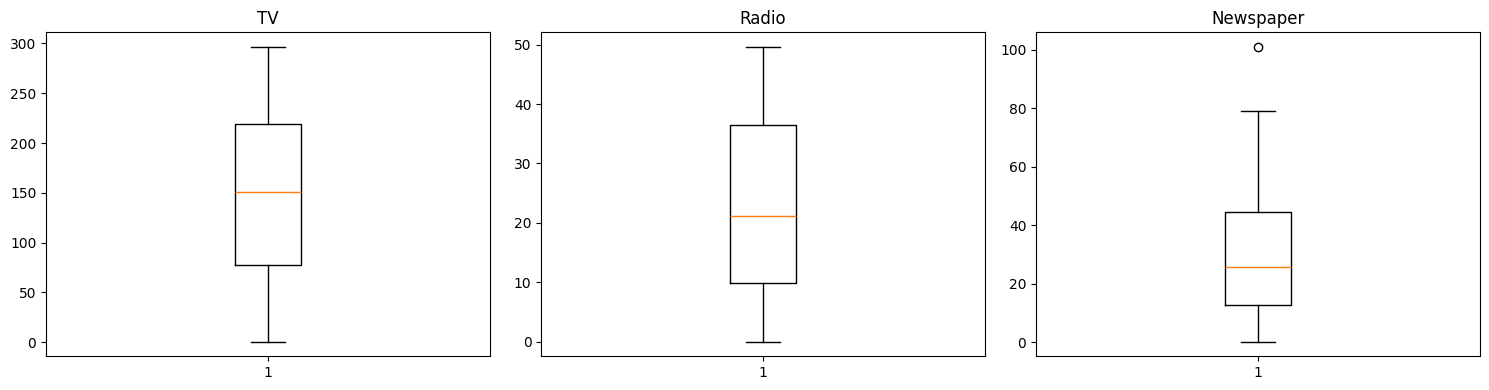

In [93]:
n_cols = 3
n_rows = math.ceil(len(X_train.columns)/n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()
for ax, col in zip(axes, X_train.columns):
    ax.boxplot(X_train[col])
    ax.set_title(col)
for ax in axes[len(X_train.columns):]:
    ax.remove()
plt.tight_layout()
plt.show()

In [8]:
def filter_outliers(df):
    mask = (
        (df['Newspaper'] <= 80)
    )
    return df[mask]

X_train = filter_outliers(X_train)
y_train = y_train.loc[X_train.index]

Normalisasi distribusi.

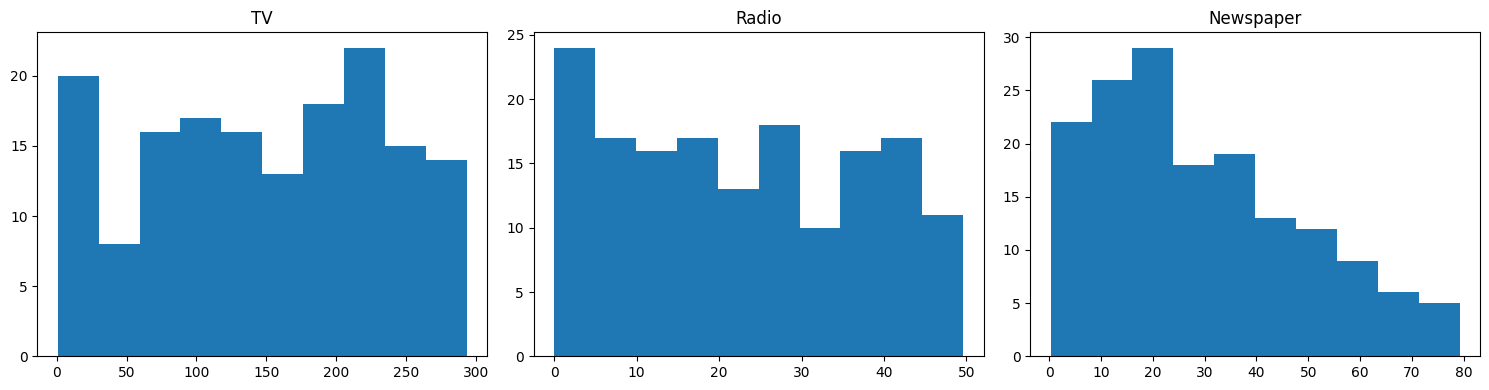

In [97]:
n_cols = 3
n_rows = math.ceil(len(X_train.columns)/n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()
for ax, col in zip(axes, X_train.columns):
    ax.hist(X_train[col])
    ax.set_title(col)
for ax in axes[len(X_train.columns):]:
    ax.remove()
plt.tight_layout()
plt.show()

In [9]:
X_train.columns[X_train.skew() > 1], X_train.columns[X_train.skew() < -1]

(Index([], dtype='object'), Index([], dtype='object'))

In [ ]:
# transformer = ColumnTransformer([
#     ('log_right', FunctionTransformer(np.log1p, validate=False, feature_names_out='one-to-one'), ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']),
#     # ('log_left', FunctionTransformer(lambda x: np.power(x, 2), validate=False), [])
# ], remainder='passthrough')

Training.

In [10]:
model = Pipeline([
    # ('log_transform', transformer),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

,steps,"[('scaler', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [12]:
params = LinearRegression().get_params()
pd.DataFrame(params.items(), columns=["Parameter", "Value"])

,Parameter,Value
0,copy_X,True
1,fit_intercept,True
2,n_jobs,None
3,positive,False
4,tol,0.000001


Evaluasi.

In [100]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (RMSE): {mse**0.5:.2f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (RMSE): 1.78
R-squared (R2): 0.8996


Feature importance.

In [101]:
feat_importance = pd.DataFrame({'feature': X_train.columns, 'coefficients': model.named_steps['regressor'].coef_})
feat_importance = feat_importance.sort_values(by='coefficients', ascending=False)

print(feat_importance)

     feature  coefficients
0         TV      3.735009
1      Radio      2.795580
2  Newspaper      0.043575


Export model.

In [102]:
with open(r'..\models\lr_model.pkl', 'wb') as file:
    pickle.dump(model, file)